<a href="https://colab.research.google.com/github/MihaelaHudisteanu/PMP-2024/blob/main/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.6 MB/s eta 0:00:00


In [4]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm


In [5]:
states = ["dificil", "mediu", "usor"]
n_states = len(states)
print('Number of hidden states :',n_states)
observations = ["FB", "B", "S", "NS"]
n_observations = len(observations)
print('Number of observations :',n_observations)


Number of hidden states : 3
Number of observations : 4


In [6]:
state_probability = np.array([1/3, 1/3, 1/3])
print("State probability: ", state_probability)

# Define the state transition probabilities
transition_probability = np.array([[0, 0.5, 0.5],
								[0.5, 0.25, 0.25],
                [0.5, 0.25, 0.25]])
print("\nTransition probability:\n", transition_probability)
# Define the observation likelihoods
emission_probability= np.array([[0.1, 0.2, 0.4, 0.3],
								[0.15, 0.25, 0.5, 0.1],
                [0.2, 0.3, 0.4, 0.1]])
print("\nEmission probability:\n", emission_probability)


State probability:  [0.33333333 0.33333333 0.33333333]

Transition probability:
 [[0.   0.5  0.5 ]
 [0.5  0.25 0.25]
 [0.5  0.25 0.25]]

Emission probability:
 [[0.1  0.2  0.4  0.3 ]
 [0.15 0.25 0.5  0.1 ]
 [0.2  0.3  0.4  0.1 ]]


In [10]:
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability


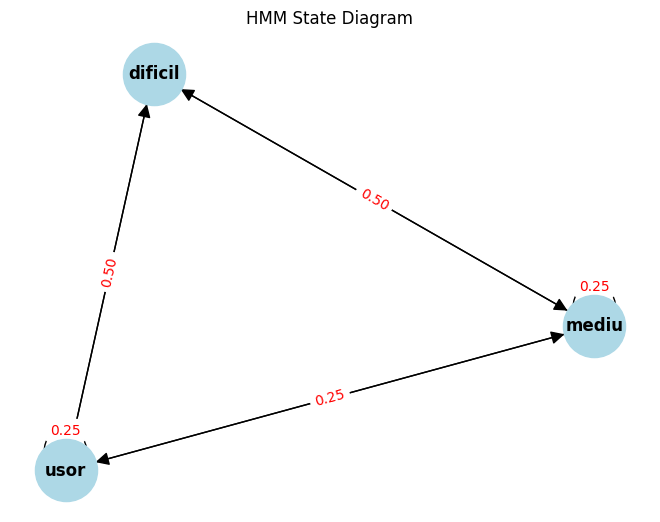

In [11]:
G = nx.DiGraph()

for i, state in enumerate(states):
    G.add_node(state)

for i, state_from in enumerate(states):
    for j, state_to in enumerate(states):
        prob = transition_probability[i, j]
        if prob > 0:
            G.add_edge(state_from, state_to, label=f'{prob:.2f}')


pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title('HMM State Diagram')
plt.show()

In [14]:
# Define the sequence of observations
observations_sequence = np.array([0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2]).reshape(-1, 1)
observations_sequence


array([[0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [3],
       [1],
       [1],
       [2]])

In [15]:
# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)


Most likely hidden states: [2 2 0 2 0 1 0 2 0 2 0 1]
